# Investigacion Corta 2:  Aprendizaje Supervisado

# EDA

### Data Set used:

- German credit Risk
- https://www.kaggle.com/uciml/german-credit

In [1]:
# ACtivate Intellisense
%config IPCompleter.greedy=True

In [2]:
#import Libraries

import pandas as Pd
import numpy as Npy
import openpyxl as pyx
from sklearn.tree import export_graphviz
from matplotlib import pyplot as plt
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB

In [3]:
# First import Data Set bia .csv file
DS = Pd.read_csv('german_credit_data.csv')
# Data set size (Row, Columns)
DS.shape

(1000, 11)

### Columns description:

- Age (numeric)
- Sex (text: male, female)
- Job (numeric: 0 - unskilled and non-resident, 1 - unskilled and resident, 2 - skilled, 3 - highly skilled)
- Housing (text: own, rent, or free)
- Saving accounts (text - little, moderate, quite rich, rich)
- Checking account (numeric, in DM - Deutsch Mark)
- Credit amount (numeric, in DM)
- Duration (numeric, in month)
- Purpose (text: car, furniture/equipment, radio/TV, domestic appliances, repairs, education, business, vacation/others) 


In [4]:
# Show the first 5 instances
DS.head()

,Unnamed: 0,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk
0,0,67,male,2,own,NaN,little,1169,6,radio/TV,good
1,1,22,female,2,own,little,moderate,5951,48,radio/TV,bad
2,2,49,male,1,own,little,NaN,2096,12,education,good
3,3,45,male,2,free,little,little,7882,42,furniture/equipment,good
4,4,53,male,2,free,little,little,4870,24,car,bad


In [5]:
# relevant columns
Cols_To_Use = ['Age', 'Sex', 'Job', 'Saving accounts', 'Checking account', 'Credit amount', 'Duration', 'Purpose', 'Risk']

In [6]:
# Our new Data Set
DS = DS[Cols_To_Use]
# Show first 5 lines of our new Data Set
DS.head()

,Age,Sex,Job,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk
0,67,male,2,NaN,little,1169,6,radio/TV,good
1,22,female,2,little,moderate,5951,48,radio/TV,bad
2,49,male,1,little,NaN,2096,12,education,good
3,45,male,2,little,little,7882,42,furniture/equipment,good
4,53,male,2,little,little,4870,24,car,bad


In [7]:
# check if we have empty values.
DS.isnull().values.any()

True

In [8]:
# lets remove those instances
DS = DS.dropna()
# Show how many instances do we have
DS.shape

(522, 9)

### Mapping rangesto a numeric value: 

SEX
- male -> 0
- female -> 1

SAVING ACCOUNTS
- little -> 0
- moderate -> 1
- quite rich -> 2
- rich -> 3

CHECKING ACCOUNTS
- little -> 0
- moderate -> 1
- rich -> 2

PURPOSE
- radio/TV -> 0
- education -> 1
- furniture/equipment -> 2
- car -> 3
- business 4
- domestic appliances -> 5
- repairs -> 6
- vacation/others -> 7

RISK
- bad -> 0
- good -> 1

In [9]:
# Performing SEX mapping defined
DS['Sex'] = DS['Sex'].replace({'male': 0, 'female': 1})
# Performing SAVING ACCOUNTS mapping defined
DS['Saving accounts'] = DS['Saving accounts'].replace({'little': 0, 'moderate': 1, 'quite rich' : 2, 'rich' : 3})
#DS['Saving accounts'] = DS['Saving accounts'].replace({'little': 0, 'moderate': 0, 'quite rich' : 1, 'rich' : 1})
# Performing CHECKING ACCOUNT mapping defined
DS['Checking account'] = DS['Checking account'].replace({'little': 0, 'moderate': 1, 'rich' : 2})
# Performing PURPOSE mapping defined
DS['Purpose'] = DS['Purpose'].replace({'radio/TV': 0, 'education': 1, 'furniture/equipment' : 2, 'car' : 3, 'business' : 4, 'domestic appliances' : 5, 'repairs' : 6, 'vacation/others' : 7})
# Performing PURPOSE mapping defined
DS['Risk'] = DS['Risk'].replace({'bad': 0, 'good': 1})


In [10]:
DS['Credit amount'] = DS['Credit amount']/100

In [11]:
# Print the first 5 instances
DS.head()

,Age,Sex,Job,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk
1,22,1,2,0,1,59.51,48,0,0
3,45,0,2,0,0,78.82,42,2,1
4,53,0,2,0,0,48.70,24,3,0
7,35,0,3,0,1,69.48,36,3,1
9,28,0,3,0,1,52.34,30,3,0


In [12]:
# Print the last 5 instances
DS.tail()

,Age,Sex,Job,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk
989,48,0,1,0,1,17.43,24,0,1
993,30,0,3,0,0,39.59,36,2,1
996,40,0,3,0,0,38.57,30,3,1
998,23,0,2,0,0,18.45,45,0,0
999,27,0,2,1,1,45.76,45,3,1


In [13]:
# Create the features and labels of our data set
features =  DS[['Saving accounts','Checking account','Credit amount', 'Duration']]
#features =  DS[['Saving accounts','Credit amount', 'Duration']]
labels = DS['Risk']

In [14]:
features.head()

,Saving accounts,Checking account,Credit amount,Duration
1,0,1,59.51,48
3,0,0,78.82,42
4,0,0,48.70,24
7,0,1,69.48,36
9,0,1,52.34,30


In [15]:
# import scikit-learm library and split the data set in 2
# categories, train and test. 
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(features,labels,random_state=15)

In [16]:
# trian shape
x_train.shape

(391, 4)

In [17]:
y_train.shape

(391,)

In [18]:
# test shape
x_test.shape

(131, 4)

In [19]:
y_test.shape

(131,)

#### Using kNN

In [20]:
training_accuracy = []
test_accuracy = []

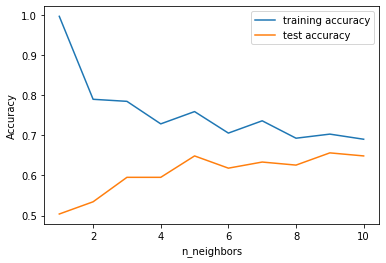

In [21]:
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt
%matplotlib inline

neighbors_settings = range(1, 11)
for n_neighbors in neighbors_settings:
    # se construye el modelo de clasificacion
    clf = KNeighborsClassifier(n_neighbors=n_neighbors)
    clf.fit(x_train, y_train)
    # se almacena el "training set accuracy"
    training_accuracy.append(clf.score(x_train, y_train))
    # se almacena la "generalization accuracy"
    test_accuracy.append(clf.score(x_test, y_test))
plt.plot(neighbors_settings, training_accuracy, label="training accuracy")
plt.plot(neighbors_settings, test_accuracy, label="test accuracy")
plt.ylabel("Accuracy")
plt.xlabel("n_neighbors")
plt.legend()

#### Lineal Regression
We apply here the second Supervised learning: Lineal Regression

In [22]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression().fit(x_train, y_train)

In [23]:
print("Training set score: {:.2f}".format(lr.score(x_train, y_train)))
print("Test set score: {:.2f}".format(lr.score(x_test, y_test)))

Training set score: 0.09
Test set score: 0.15


##### Results
It seems that lineal regression didn't go very well  with this data set. 

#### Decision Tree
We apply here the first Supervised learning: Decision Tree

In [24]:
from sklearn.tree import DecisionTreeClassifier

In [25]:
DecisionTreeModel = DecisionTreeClassifier(max_depth=5)
DecisionTreeModel.fit(x_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=5,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [26]:
from sklearn.metrics import accuracy_score
y_predict = DecisionTreeModel.predict(x_test)
accuracy_score(y_test, y_predict)

0.5954198473282443

In [27]:
from sklearn.tree import export_graphviz
export_graphviz(DecisionTreeModel, out_file='simple_tree.dot', feature_names=features.columns,impurity=False,class_names=['Not good','Good'],filled=True)
from subprocess import call
#call(['dot', '-T', 'png', 'simple_tree.dot', '-o', 'simple_tree.png'])

from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus
dot_data = StringIO()
export_graphviz(DecisionTreeModel, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

In [28]:
#<img src='simple_tree.png' width = 1000px>
#from IPython.display import Image
#Image(filename='simple_tree.png')

#### Logistic Regression


In [29]:
from sklearn.linear_model import LogisticRegression

X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.33)
logreg = LogisticRegression(solver='liblinear').fit(X_train, y_train)
print("Training set score: {:.3f}".format(logreg.score(X_train, y_train)))
print("Test set score: {:.3f}".format(logreg.score(X_test, y_test)))

Training set score: 0.636
Test set score: 0.636


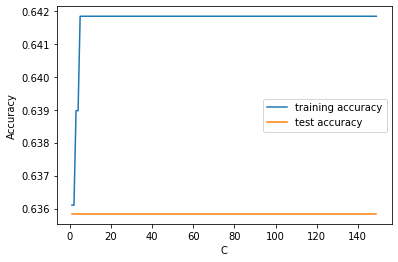

In [30]:
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

training_acc = []
test_acc = []

rango = range(1, 150)
for c in rango:
    # se construye el modelo de clasificacion
    clf = LogisticRegression(C=c, solver='liblinear')
    clf.fit(X_train, y_train)
    # se almacena el "training set accuracy"
    training_acc.append(clf.score(X_train, y_train))
    # se almacena la "generalization accuracy"
    test_acc.append(clf.score(X_test, y_test))
plt.plot(rango, training_acc, label="training accuracy")
plt.plot(rango, test_acc, label="test accuracy")
plt.ylabel("Accuracy")
plt.xlabel("C")
plt.legend()

##### Results
We have got better results with the logistic regression. We don't have overfitting since those values are really close. 


#### Using KSVM

In [31]:

from sklearn.svm import SVC

X_train, X_test, y_train, y_test = train_test_split(
features, labels, random_state=0)
svc = SVC(gamma='auto')
svc.fit(X_train, y_train)
print("Accuracy on training set: {:.2f}".format(svc.score(X_train, y_train)))
print("Accuracy on test set: {:.2f}".format(svc.score(X_test, y_test)))

Accuracy on training set: 0.87
Accuracy on test set: 0.56


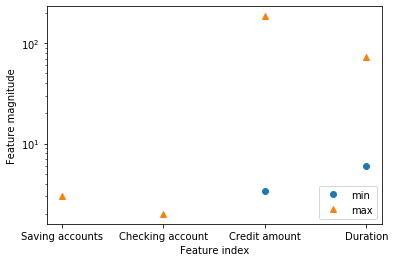

In [32]:
plt.plot(X_train.min(axis=0), 'o', label="min")
plt.plot(X_train.max(axis=0), '^', label="max")
plt.legend(loc=4)
plt.xlabel("Feature index")
plt.ylabel("Feature magnitude")
plt.yscale("log")

In [33]:
# compute the minimum value per feature on the training set
min_on_training = X_train.min(axis=0)

# compute the range of each feature (max - min) on the training set
range_on_training = (X_train - min_on_training).max(axis=0)

# subtract the min, and divide by range
# afterward, min=0 and max=1 for each feature
X_train_scaled = (X_train - min_on_training) / range_on_training

print("Minimum for each feature\n{}".format(X_train_scaled.min(axis=0)))
print("Maximum for each feature\n {}".format(X_train_scaled.max(axis=0)))

Minimum for each feature
Saving accounts     0.0
Checking account    0.0
Credit amount       0.0
Duration            0.0
dtype: float64
Maximum for each feature
 Saving accounts     1.0
Checking account    1.0
Credit amount       1.0
Duration            1.0
dtype: float64


In [34]:
# use THE SAME transformation on the test set,
# using min and range of the training set

X_test_scaled = (X_test - min_on_training) / range_on_training

Text(0, 0.5, 'Feature magnitude')

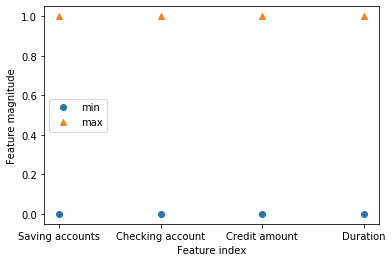

In [35]:
plt.figure()
plt.plot(X_train_scaled.min(axis=0), 'o', label="min")
plt.plot(X_train_scaled.max(axis=0), '^', label="max")
plt.legend(loc=6)
plt.xlabel("Feature index")
plt.ylabel("Feature magnitude")

In [36]:
# Let see how is the accuracy
svc = SVC(gamma='auto')
svc.fit(X_train_scaled, y_train)
print("Accuracy on training set: {:.3f}".format(
svc.score(X_train_scaled, y_train)))
print("Accuracy on test set: {:.3f}".format(svc.score(X_test_scaled, y_test)))

Accuracy on training set: 0.650
Accuracy on test set: 0.656


In [37]:
# improving it with better value of C

svc = SVC(C=120, gamma='auto')
svc.fit(X_train_scaled, y_train)
print("Accuracy on training set: {:.3f}".format(
svc.score(X_train_scaled, y_train)))
print("Accuracy on test set: {:.3f}".format(svc.score(X_test_scaled, y_test)))

Accuracy on training set: 0.662
Accuracy on test set: 0.664


In [38]:
# improving gamma value

svc = SVC(C=120, gamma=0.2)
svc.fit(X_train_scaled, y_train)
print("Accuracy on training set: {:.3f}".format(
svc.score(X_train_scaled, y_train)))
print("Accuracy on test set: {:.3f}".format(svc.score(X_test_scaled, y_test)))

Accuracy on training set: 0.647
Accuracy on test set: 0.656


##### Results

It seems this Data Set is a little bit dummy since we got the same accuray no matter the C and gamma value. 
What is weird here is that there are too few points in the graph... 

#### Random Forest

In [51]:
from sklearn.ensemble import RandomForestClassifier
x_train, x_test, y_train, y_test = train_test_split(features,labels, random_state=13)
rf = RandomForestClassifier(n_estimators=10).fit(x_train, y_train)
print("Training set score: {:.3f}".format(rf.score(x_train, y_train)))
print("Test set score: {:.3f}".format(rf.score(x_test, y_test)))

Training set score: 0.959
Test set score: 0.626


In [40]:
rf = RandomForestClassifier(n_estimators=100).fit(x_train, y_train)
print("Training set score: {:.3f}".format(rf.score(x_train, y_train)))
print("Test set score: {:.3f}".format(rf.score(x_test, y_test)))

Training set score: 0.997
Test set score: 0.588


In [41]:
y_predict = rf.predict(x_test)
accuracy_score(y_test,y_predict)

0.5877862595419847

In [42]:

from sklearn.tree import export_graphviz
estimator = rf.estimators_[0]
export_graphviz(estimator, out_file='complete_tree.dot', feature_names=features.columns,impurity=False,class_names=['Not Good','Good'],filled=True)
from subprocess import call
#call(['dot', '-T', 'png', 'complete_tree.dot', '-o', 'complete_tree.png'])
# This is not working on windows.

In [43]:
plt.style.use('seaborn')
importances = Pd.DataFrame({'feature' : X_train.columns, 'importance':rf.feature_importances_})
importances = importances.sort_values('importance', ascending = False).set_index('feature')
importances.head(9)

,importance
feature,
Credit amount,0.620215
Duration,0.250938
Checking account,0.065356
Saving accounts,0.063490


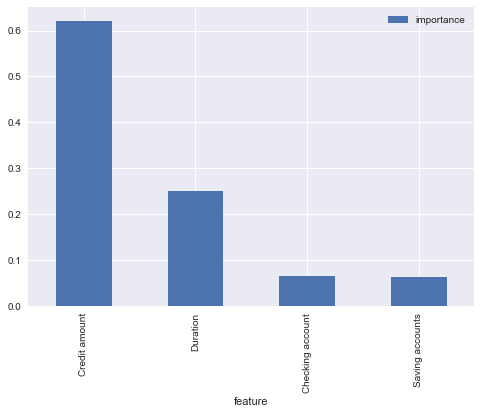

In [44]:
importances.plot.bar()

#### Results 
As per we increment the estimators we got a worst results. 36% is a big difference. Seems to be overfitting?

#### Naive Bayes

In [50]:
#### Naive Bayes
nbg = GaussianNB().fit(X_train, y_train)
print("Training set score: {:.3f}".format(nbg.score(X_train, y_train)))
print("Test set score: {:.3f}".format(nbg.score(X_test, y_test)))

Training set score: 0.532
Test set score: 0.603


### Other 2 methods including the ensemble one



- Web Soruce Page: https://towardsdatascience.com/ensemble-learning-using-scikit-learn-85c4531ff86a
- Method: Voting Classifier. 
- Web Source Page: https://scikit-learn.org/stable/modules/ensemble.html
- Method: Voting Regressor.
- Method: Gradient Boosting Classifier.
- Method: Ada Boost.


#### Gradient Boosting Classifier

In [46]:
from sklearn.ensemble import GradientBoostingClassifier

In [48]:
gradBoostC = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0, max_depth=1, random_state=0).fit(X_train, y_train)
gradBoostC.score(X_test, y_test)

0.5419847328244275

#### Voting Classifier

In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import VotingClassifier


clf1 = LogisticRegression(solver='lbfgs', multi_class='multinomial', random_state=1)
clf2 = RandomForestClassifier(n_estimators=50, random_state=1)
clf3 = GaussianNB()
eclf = VotingClassifier(estimators=[('lr', clf1), ('rf', clf2), ('gnb', clf3)], voting='hard')

for clf, label in zip([clf1, clf2, clf3, eclf], ['Logistic Regression', 'Random Forest', 'naive Bayes', 'Ensemble']): scores = cross_val_score(clf, features, labels, cv=5, scoring='accuracy')
print("Accuracy: %0.2f (+/- %0.2f) [%s]" % (scores.mean(), scores.std(), label))

#### Voting Regressor

The idea behind the VotingClassifier is to combine conceptually different machine learning classifiers and use a majority vote or the average predicted probabilities (soft vote) to predict the class labels. (scikit-learn web page)


In [ ]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import VotingRegressor


# Training classifiers
gbr = GradientBoostingRegressor(random_state=1, n_estimators=10)
rfr = RandomForestRegressor(random_state=1, n_estimators=10)
lr = LinearRegression()
vr = VotingRegressor(estimators=[('gb', gbr), ('rf', rfr), ('lr', lr)])
vr = vr.fit(features, labels)

##### Plotting the voting predictions

In [ ]:
print(__doc__)

import matplotlib.pyplot as plt

from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import VotingRegressor


X = features
y = labels

# Training classifiers
gbr = GradientBoostingRegressor(random_state=1, n_estimators=10)
rfr = RandomForestRegressor(random_state=1, n_estimators=10)
lr = LinearRegression()
vr = VotingRegressor([('gb', reg1), ('rf', reg2), ('lr', reg3)])
gbr.fit(features, labels)
rfr.fit(features,labels)
lr.fit(features, labels)
vr.fit(features, labels)

xt = features[:20]

plt.figure()
plt.plot(gbr.predict(xt), 'gd', label='GradientBoostingRegressor')
plt.plot(rfr.predict(xt), 'b^', label='RandomForestRegressor')
plt.plot(lr.predict(xt), 'ys', label='LinearRegression')
plt.plot(vr.predict(xt), 'r*', label='VotingRegressor')
plt.tick_params(axis='x', which='both', bottom=False, top=False, labelbottom=False)
plt.ylabel('predicted')
plt.xlabel('training samples')
plt.legend(loc="best")
plt.title('Comparison of individual predictions with averaged')
plt.show()

#### Ada Boost

In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import AdaBoostClassifier
clf = AdaBoostClassifier(n_estimators=100)
scores = cross_val_score(clf, features, labels, cv=5)
scores.mean() 

# Conclusiones 


- El data set no es trivial, pero si es de complejidad baja. A pesar de que se intento variar los parametros algunos empeoraban como la regresion lineal que dio pesima. Al menos no esta como la primera vez que ejecute el data set que me dio negativa la test. 
- De los metodos utilizados la mayoria al menos fueron consistentes, no se prensento overfitting o underfitting, como el naive bayes e incluso en los de ensamble.
- Tambien los procentajes son bajos. A pesar de cambiar los parametros para mejorar los resultados, sin embargo, el cambio no fue el deseado.  
- Incluso Random Forest que es uno de los algoritmos que mas me llama la atencion y al cual le tenia mas fe, me da un claro overfitting. 